In [ ]:
import numpy as np


class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors, weights='uniform'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 3

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

        point_dist = [self.euclidian_distance(x_test, self.X_train) for x_test in X_test]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])

            return y_pred

        if self.weights == 'distance':

            dist, neigh_ind = self.kneighbors(X_test, return_distance=True)

            inv_dist = 1 / dist

            mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]

            proba = []

            for i, row in enumerate(mean_inv_dist):

                row_pred = self.y_train[neigh_ind[i]]

                for k in range(self.n_classes):
                    indices = np.where(row_pred == k)
                    prob_ind = np.sum(row[indices])
                    proba.append(np.array(prob_ind))

            predict_proba = np.array(proba).reshape(X_test.shape[0],
                                                    self.n_classes)

            y_pred = np.array([np.argmax(item) for item in predict_proba])

            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        acc = float(sum(y_pred == y_test)) / float(len(y_test))
        return acc, y_pred

In [ ]:
def read_data(filePath):

    with open(filePath, "r") as f:
        data = f.readlines()
    f.close()

    data = [d[:-1] for d in data]

    features_index = [1,2,3,4]
    features = []
    labels = []
    updated_features = []
    for d in data:
        label = d.split(' ')[0]
        labels.append(int(label))
        nums = [p.split(':')[-1] for p in d.split(' ')[1:]]
        index = [q.split(':')[0] for q in d.split(' ')[1:]]
        feature = [float(n) for n in nums if n]
        indexes = [int(i) for i in index if i]
        for j in range(len(features_index)):
            if indexes[j] != features_index[j]:
                feature.insert(j,0)
                indexes.insert(j,0)
        features.append(feature)
    features = np.vstack(features)
    labels = np.array(labels)

    for x in features:
        new = np.where(x==0, np.mean(features[:,1]),x)
        updated_features.append(new)

    return np.array(updated_features), labels

In [ ]:
#Preparing the data
trainDataPath = "/content/iris_dataset.txt"

X,y = read_data(trainDataPath)
# x_test,y_test = read_data(testDataPath)

In [ ]:
from sklearn.model_selection import train_test_split

mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu ) / sigma

In [ ]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
classifier = KNearestNeighbors(X, y, n_neighbors=9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
accuracy, predicted_labels = classifier.score(X_test, y_test)
accuracy

0.9555555555555556

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


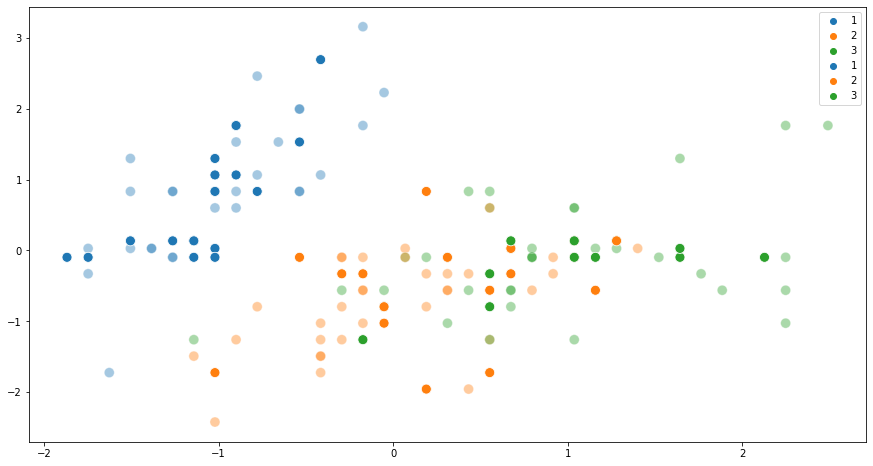

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
palette1 ={1: "C0", 2: "C1", 3: "C2"}
ax = sns.scatterplot(X_train[:,0], X_train[:, 1], hue=y_train, palette=palette1, marker="o", s=100, alpha=0.4)
sns.scatterplot(X_test[:,0], X_test[:, 1], hue=predicted_labels, palette=palette1, marker="o", s=100)
plt.title("Dark Color:Test Data, Light Color:Train Data")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


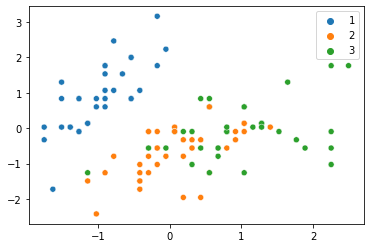

In [ ]:





palette ={1: "C0", 2: "C1", 3: "C2"}
sns.scatterplot(X_train[:,0], X_train[:, 1], hue=y_train, palette=palette)
plt.show()